In [1]:
# Henrique Cursino Vieira

In [2]:
import re
import glob
import numpy as np
import pandas as pd


# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from nltk.corpus import wordnet

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import nltk
nltk.download('stopwords')

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/henrique/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# TODO: Converter no script anterior para
# gerar o corpora dos documentos de patente

# NAO CARREGAR A PARTIR DE UMA PLANILHA

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
documents = pd.read_csv('patents_data.csv')
documents.head()

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,idx,title_raw,text_raw,title,text,content
0,0387659,\n\n SYSTEMS AND METHODS FO...,\n The present disclosure provides ...,systems and methods for adjusting the output o...,the present disclosure provides systems and me...,systems and methods for adjusting the output o...
1,10729058,\n\n Systems and methods fo...,\n The present disclosure provides ...,systems and methods for adjusting the output o...,the present disclosure provides systems and me...,systems and methods for adjusting the output o...
2,6745128,\n\n Methods and systems fo...,\n Methods and systems for characte...,methods and systems for managing farmland,methods and systems for characterizing and man...,methods and systems for managing farmland meth...
3,6549852,\n\n Methods and systems fo...,\n Methods and systems for characte...,methods and systems for managing farmland,methods and systems for characterizing and man...,methods and systems for managing farmland meth...
4,0018431,\n\n METHODS AND SYSTEMS FO...,\n Methods and systems for characte...,methods and systems for managing farmland,methods and systems for characterizing and man...,methods and systems for managing farmland meth...


In [6]:
# TODO: provavelemente remover isso
documents = documents[['idx', 'content']]
documents.head()

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,idx,content
0,0387659,systems and methods for adjusting the output o...
1,10729058,systems and methods for adjusting the output o...
2,6745128,methods and systems for managing farmland meth...
3,6549852,methods and systems for managing farmland meth...
4,0018431,methods and systems for managing farmland meth...


In [7]:
# Gerando os tokens

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
def sent_to_words(document_content):
    for content in document_content:
        yield(gensim.utils.simple_preprocess(str(content), 
                                             deacc=True))

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
data_words = list(sent_to_words(documents['content']))

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Criando os modelos de bigram e trigam

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
print(trigram_mod[bigram_mod[data_words[0]]])

['systems', 'and', 'methods', 'for', 'adjusting', 'the', 'output', 'of', 'field', 'measurement', 'system', 'to', 'conform', 'to', 'agronomy', 'measurements', 'the', 'present', 'disclosure', 'provides', 'systems', 'and', 'methods', 'for', 'adjusting', 'the', 'output', 'of', 'field', 'measurement', 'system', 'to', 'conform', 'to', 'agronomy', 'measurements', 'in', 'particular', 'the', 'present', 'subject', 'matter', 'is', 'directed', 'to', 'calibration', 'process', 'and', 'system', 'that', 'uses', 'calibration', 'model', 'to', 'convert', 'field', 'measurement', 'data', 'expressed', 'according', 'to', 'an', 'automatic', 'system', 'metric', 'into', 'agronomy', 'data', 'that', 'is', 'expressed', 'according', 'to', 'an', 'agronomy', 'metric']


/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# Pre processamento 
# - remocao de stop-words
# - aplicando os modelos de bigram e trigram
# - lemmatizacao das palavras

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
data_words_nostops = remove_stopwords(data_words)
data_words_nostops[0][0:5]

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['systems', 'methods', 'adjusting', 'output', 'field']

In [16]:
data_words_bigrams = make_bigrams(data_words_nostops)
data_words_bigrams[0][0:5]

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['systems', 'methods', 'adjusting', 'output', 'field']

In [17]:
nlp = spacy.load('en', disable=['parser', 'ner'])

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
postags = ['NOUN', 'ADJ', 'VERB', 'ADV']
data_lemmatized = lemmatization(data_words_bigrams, 
                                allowed_postags=postags)
data_lemmatized[0][0:5]

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['system', 'method', 'adjust', 'output', 'field']

In [19]:
# Criacao do dicionario para dados e o corpus

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
id2word = corpora.Dictionary(data_lemmatized)

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
texts = data_lemmatized

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
corpus = [id2word.doc2bow(text) for text in texts]

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
# Construcao da modelagem de topicos

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                      id2word = id2word,
                                      num_topics = 20,
                                      random_state = 150,
                                      update_every = 1,
                                      chunksize = 100,
                                      alpha = 'auto',
                                      per_word_topics = True)

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
lda_model.print_topics()

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.001*"water" + 0.001*"soil" + 0.001*"plant" + 0.001*"nutrient" + 0.001*"percent" + 0.001*"hydrolyze" + 0.001*"group" + 0.001*"polyacrylamide" + 0.001*"weight" + 0.001*"soluble"'),
 (1,
  '0.082*"soybean" + 0.079*"product" + 0.062*"content" + 0.031*"high" + 0.022*"determine" + 0.020*"provide" + 0.017*"line" + 0.017*"use" + 0.016*"acid" + 0.014*"composition"'),
 (2,
  '0.067*"nitrogen" + 0.052*"make" + 0.040*"calcium" + 0.033*"comprise" + 0.031*"medium" + 0.031*"moisture" + 0.031*"wherein" + 0.027*"disperse" + 0.024*"soil" + 0.018*"micronutrient"'),
 (3,
  '0.063*"combination" + 0.053*"reduce" + 0.049*"temperature" + 0.049*"production" + 0.040*"use" + 0.038*"link" + 0.034*"crop" + 0.027*"increase" + 0.026*"yield" + 0.024*"mean"'),
 (4,
  '0.216*"plant" + 0.115*"corn" + 0.081*"invention" + 0.077*"variety" + 0.071*"seed" + 0.060*"produce" + 0.052*"ch" + 0.048*"relate" + 0.038*"hybrid" + 0.030*"method"'),
 (5,
  '0.073*"method" + 0.069*"crop" + 0.064*"use" + 0.052*"material" + 0.04

In [26]:
lda_model.get_topic_terms(0)

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(449, 0.0014739995),
 (49, 0.0014173476),
 (162, 0.0013409045),
 (472, 0.0011502603),
 (474, 0.0011445957),
 (469, 0.0011084328),
 (467, 0.000956207),
 (477, 0.0009254548),
 (488, 0.00091675314),
 (482, 0.0008835681)]

In [27]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -10.281368078728613

Coherence Score:  0.4456349299801703


In [28]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.444617  0.006218       1        1  43.184958
13    -0.237587  0.116857       2        1  11.413419
8     -0.125216 -0.351295       3        1   8.293293
5     -0.099438  0.094875       4        1   8.071313
14     0.044429 -0.026482       5        1   5.131216
9     -0.084362  0.035982       6        1   4.628421
19    -0.020394  0.062146       7        1   3.256138
3     -0.054842  0.115139       8        1   3.148012
12     0.058814 -0.013749       9        1   2.661346
10     0.127779 -0.015487      10        1   2.592503
7      0.079730  0.020047      11        1   2.393086
2      0.039940  0.045823      12        1   1.600839
17     0.100266  0.032985      13        1   1.038727
1     -0.007592 -0.159546      14        1   0.882305
15     0.071535  0.056306      15        1   0.780259
11     0.115069  0.021777      16        1   0.490964
18     0.100963  0.027174      17        1   0.160955
6      0.102735 -0.048879      18        1   0.091797
16     0.105394 -0.040337      19        1   0.091576
0      0.127394  0.020446      20        1   0.088873, topic_info=           Term         Freq        Total Category  logprob  loglift
646        corn   772.000000   772.000000  Default  30.0000  30.0000
162       plant  1601.000000  1601.000000  Default  29.0000  29.0000
639     soybean   167.000000   167.000000  Default  28.0000  28.0000
48         seed   582.000000   582.000000  Default  27.0000  27.0000
157     include   153.000000   153.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
454      amount     0.009959    27.476461  Topic20  -7.2337  -0.8969
460    describe     0.010001    56.332614  Topic20  -7.2296  -1.6107
145        also     0.009932   133.064867  Topic20  -7.2365  -2.4771
464     exhibit     0.009867    26.261134  Topic20  -7.2431  -0.8610
34   fertilizer     0.009821    33.591965  Topic20  -7.2478  -1.1119

[1007 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
91        1  0.218344  access
91        4  0.218344  access
91        8  0.218344  access
0         1  0.953777  accord
0         4  0.018702  accord
...     ...       ...     ...
52        4  0.028225   yield
52        5  0.014113   yield
52        8  0.183465   yield
52       15  0.014113   yield
53        2  0.668424    zone

[967 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 14, 9, 6, 15, 10, 20, 4, 13, 11, 8, 3, 18, 2, 16, 12, 19, 7, 17, 1])

In [29]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                      id2word = id2word,
                                      num_topics = num_topics,
                                      random_state = 150,
                                      update_every = 1,
                                      chunksize = 100,
                                      alpha = 'auto',
                                      per_word_topics = True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/henrique/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


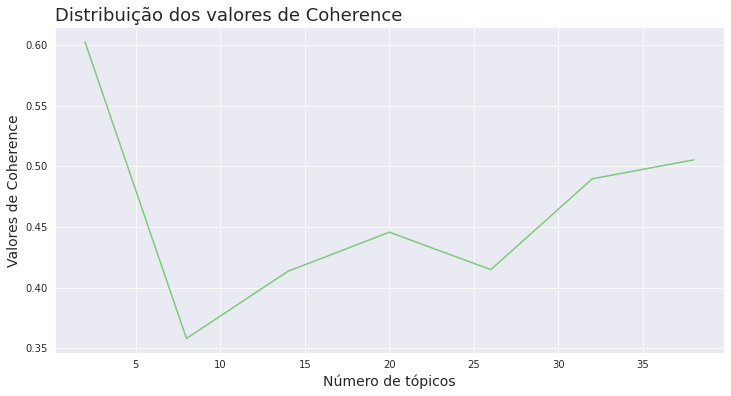

In [31]:
limit=40; start=2; step=6;
x = range(start, limit, step)

sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x, coherence_values)
ax.figure.set_size_inches(12,6)
ax.set_title("Distribuição dos valores de Coherence", loc='left', fontsize=18)
ax.set_xlabel("Número de tópicos", fontsize=14)
ax.set_ylabel("Valores de Coherence", fontsize=14)
ax = ax

In [32]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.6023
Num Topics = 8  has Coherence Value of 0.3581
Num Topics = 14  has Coherence Value of 0.4134
Num Topics = 20  has Coherence Value of 0.4456
Num Topics = 26  has Coherence Value of 0.4148
Num Topics = 32  has Coherence Value of 0.4896
Num Topics = 38  has Coherence Value of 0.5052


/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics())

[(0, '0.001*"water" + 0.001*"soil" + 0.001*"plant" + 0.001*"nutrient" + 0.001*"percent" + 0.001*"hydrolyze" + 0.001*"group" + 0.001*"polyacrylamide" + 0.001*"weight" + 0.001*"soluble"'), (1, '0.082*"soybean" + 0.079*"product" + 0.062*"content" + 0.031*"high" + 0.022*"determine" + 0.020*"provide" + 0.017*"line" + 0.017*"use" + 0.016*"acid" + 0.014*"composition"'), (2, '0.067*"nitrogen" + 0.052*"make" + 0.040*"calcium" + 0.033*"comprise" + 0.031*"medium" + 0.031*"moisture" + 0.031*"wherein" + 0.027*"disperse" + 0.024*"soil" + 0.018*"micronutrient"'), (3, '0.063*"combination" + 0.053*"reduce" + 0.049*"temperature" + 0.049*"production" + 0.040*"use" + 0.038*"link" + 0.034*"crop" + 0.027*"increase" + 0.026*"yield" + 0.024*"mean"'), (4, '0.216*"plant" + 0.115*"corn" + 0.081*"invention" + 0.077*"variety" + 0.071*"seed" + 0.060*"produce" + 0.052*"ch" + 0.048*"relate" + 0.038*"hybrid" + 0.030*"method"'), (5, '0.073*"method" + 0.069*"crop" + 0.064*"use" + 0.052*"material" + 0.043*"present" + 0.0

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
model_topics

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  [('water', 0.0014739992),
   ('soil', 0.0014173473),
   ('plant', 0.0013409043),
   ('nutrient', 0.0011502601),
   ('percent', 0.0011445954),
   ('hydrolyze', 0.0011084325),
   ('group', 0.0009562068),
   ('polyacrylamide', 0.0009254546),
   ('weight', 0.00091675296),
   ('soluble', 0.0008835679)]),
 (16,
  [('acid', 0.008697635),
   ('soybean', 0.005686916),
   ('content', 0.0045626806),
   ('less', 0.004136049),
   ('line', 0.003487462),
   ('low', 0.0031592213),
   ('palmitic', 0.0028420065),
   ('stearic', 0.0026734322),
   ('select', 0.0023838496),
   ('method', 0.002351001)]),
 (6,
  [('image', 0.0080461735),
   ('spatial', 0.0067648515),
   ('acid', 0.006176685),
   ('soybean', 0.0061557814),
   ('content', 0.0057268054),
   ('method', 0.0049195555),
   ('structure', 0.0042798966),
   ('line', 0.0037921302),
   ('less', 0.0037888777),
   ('palmitic', 0.0034107966)]),
 (18,
  [('say', 0.056815967),
   ('modify', 0.034615725),
   ('comprise', 0.032711904),
   ('gene', 0.006

In [35]:
optimal_model.print_topics()

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.001*"water" + 0.001*"soil" + 0.001*"plant" + 0.001*"nutrient" + 0.001*"percent" + 0.001*"hydrolyze" + 0.001*"group" + 0.001*"polyacrylamide" + 0.001*"weight" + 0.001*"soluble"'),
 (1,
  '0.082*"soybean" + 0.079*"product" + 0.062*"content" + 0.031*"high" + 0.022*"determine" + 0.020*"provide" + 0.017*"line" + 0.017*"use" + 0.016*"acid" + 0.014*"composition"'),
 (2,
  '0.067*"nitrogen" + 0.052*"make" + 0.040*"calcium" + 0.033*"comprise" + 0.031*"medium" + 0.031*"moisture" + 0.031*"wherein" + 0.027*"disperse" + 0.024*"soil" + 0.018*"micronutrient"'),
 (3,
  '0.063*"combination" + 0.053*"reduce" + 0.049*"temperature" + 0.049*"production" + 0.040*"use" + 0.038*"link" + 0.034*"crop" + 0.027*"increase" + 0.026*"yield" + 0.024*"mean"'),
 (4,
  '0.216*"plant" + 0.115*"corn" + 0.081*"invention" + 0.077*"variety" + 0.071*"seed" + 0.060*"produce" + 0.052*"ch" + 0.048*"relate" + 0.038*"hybrid" + 0.030*"method"'),
 (5,
  '0.073*"method" + 0.069*"crop" + 0.064*"use" + 0.052*"material" + 0.04

In [36]:
optimal_model.get_topic_terms(0)

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(449, 0.0014739995),
 (49, 0.0014173476),
 (162, 0.0013409045),
 (472, 0.0011502603),
 (474, 0.0011445957),
 (469, 0.0011084328),
 (467, 0.000956207),
 (477, 0.0009254548),
 (488, 0.00091675314),
 (482, 0.0008835681)]

In [37]:
c = dict()
for i in range(20):
    for a,b in optimal_model.get_topic_terms(i):
        
        if not a in c.keys():
            c[a] = 1
        else:
            c[a] += 1
        
        

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
print(c)

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{449: 2, 49: 4, 162: 4, 472: 1, 474: 1, 469: 1, 467: 1, 477: 1, 488: 1, 482: 1, 639: 4, 127: 1, 630: 4, 223: 3, 370: 2, 20: 3, 634: 4, 23: 7, 451: 4, 629: 2, 623: 1, 72: 2, 614: 1, 98: 4, 551: 2, 622: 1, 89: 1, 616: 1, 621: 1, 331: 1, 353: 2, 359: 1, 78: 3, 344: 1, 30: 3, 343: 2, 52: 2, 345: 1, 646: 1, 304: 1, 642: 1, 48: 2, 521: 1, 644: 1, 46: 1, 649: 1, 13: 10, 574: 1, 18: 4, 9: 1, 22: 3, 112: 1, 19: 2, 224: 1, 315: 1, 317: 1, 633: 3, 637: 2, 71: 1, 197: 1, 176: 1, 185: 1, 157: 2, 196: 1, 193: 1, 194: 1, 169: 1, 215: 1, 145: 1, 638: 1, 589: 2, 111: 1, 454: 1, 559: 2, 591: 1, 399: 1, 375: 1, 368: 1, 374: 1, 139: 1, 191: 1, 15: 1, 275: 1, 385: 1, 124: 1, 107: 1, 6: 2, 10: 2, 97: 1, 55: 1, 380: 1, 82: 1, 657: 1, 372: 1, 665: 1, 520: 1, 670: 1, 512: 1, 471: 1, 249: 1, 200: 1, 247: 1, 243: 1, 213: 1, 172: 1, 36: 1, 413: 1, 427: 1, 45: 1, 43: 1, 34: 1, 38: 1, 276: 1, 640: 1, 84: 1, 274: 1, 272: 1, 277: 1, 271: 1, 499: 1, 287: 1, 270: 1, 596: 1, 592: 1, 597: 1, 587: 1, 588: 1, 163: 1, 153: 

In [39]:
len(c.keys())

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


133

In [40]:
optimal_model.get_topic_terms(0)

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(449, 0.0014739995),
 (49, 0.0014173476),
 (162, 0.0013409045),
 (472, 0.0011502603),
 (474, 0.0011445957),
 (469, 0.0011084328),
 (467, 0.000956207),
 (477, 0.0009254548),
 (488, 0.00091675314),
 (482, 0.0008835681)]

In [41]:
# def format_topics_sentences(ldamodel=None, corpus=None, texts=None):
#     # Init output
#     sent_topics_df = pd.DataFrame()

#     # Get main topic in each document
#     for i, row in enumerate(ldamodel[corpus]):
        
#         row = sorted(row, key=lambda x: (x[1]), reverse=True)
#         # Get the Dominant topic, Perc Contribution and Keywords for each document
#         for j, (topic_num, prop_topic) in enumerate(row):
#             print(j, (topic_num, prop_topic))
#             if j == 0:  # => dominant topic
#                 wp = ldamodel.show_topic(topic_num)
#                 topic_keywords = ", ".join([word for word, prop in wp])
#                 sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
#             else:
#                 break
#     sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

# # #     Add original text to the end of the output
#     contents = pd.Series(texts)
#     sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
#     return(sent_topics_df)

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
# df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model,
#                                                   corpus=corpus, 
#                                                   texts=data_lemmatized)

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
# # Group top 5 sentences under each topic
# sent_topics_sorteddf_mallet = pd.DataFrame()

# sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

# for i, grp in sent_topics_outdf_grpd:
#     sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
#                                              grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
#                                             axis=0)

# # Reset Index    
# sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# # Format
# sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# # Show
# sent_topics_sorteddf_mallet.head()

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
optimal_model.show_topics(formatted=False)

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  [('water', 0.0014739992),
   ('soil', 0.0014173473),
   ('plant', 0.0013409043),
   ('nutrient', 0.0011502601),
   ('percent', 0.0011445954),
   ('hydrolyze', 0.0011084325),
   ('group', 0.0009562068),
   ('polyacrylamide', 0.0009254546),
   ('weight', 0.00091675296),
   ('soluble', 0.0008835679)]),
 (16,
  [('acid', 0.008697635),
   ('soybean', 0.005686916),
   ('content', 0.0045626806),
   ('less', 0.004136049),
   ('line', 0.003487462),
   ('low', 0.0031592213),
   ('palmitic', 0.0028420065),
   ('stearic', 0.0026734322),
   ('select', 0.0023838496),
   ('method', 0.002351001)]),
 (6,
  [('image', 0.0080461735),
   ('spatial', 0.0067648515),
   ('acid', 0.006176685),
   ('soybean', 0.0061557814),
   ('content', 0.0057268054),
   ('method', 0.0049195555),
   ('structure', 0.0042798966),
   ('line', 0.0037921302),
   ('less', 0.0037888777),
   ('palmitic', 0.0034107966)]),
 (18,
  [('say', 0.056815967),
   ('modify', 0.034615725),
   ('comprise', 0.032711904),
   ('gene', 0.006

In [45]:
dictionary_initial = []
for i in range(20):
    terms  = []
    values = []
    for term, value in optimal_model.show_topic(i):
        terms.append(term)
        values.append(value)

    dictionary_initial_tmp = [ ['_'.join(terms[:3]), term] for term in terms]
    dictionary_initial = dictionary_initial + dictionary_initial_tmp

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
dictionary_initial

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['water_soil_plant', 'water'],
 ['water_soil_plant', 'soil'],
 ['water_soil_plant', 'plant'],
 ['water_soil_plant', 'nutrient'],
 ['water_soil_plant', 'percent'],
 ['water_soil_plant', 'hydrolyze'],
 ['water_soil_plant', 'group'],
 ['water_soil_plant', 'polyacrylamide'],
 ['water_soil_plant', 'weight'],
 ['water_soil_plant', 'soluble'],
 ['soybean_product_content', 'soybean'],
 ['soybean_product_content', 'product'],
 ['soybean_product_content', 'content'],
 ['soybean_product_content', 'high'],
 ['soybean_product_content', 'determine'],
 ['soybean_product_content', 'provide'],
 ['soybean_product_content', 'line'],
 ['soybean_product_content', 'use'],
 ['soybean_product_content', 'acid'],
 ['soybean_product_content', 'composition'],
 ['nitrogen_make_calcium', 'nitrogen'],
 ['nitrogen_make_calcium', 'make'],
 ['nitrogen_make_calcium', 'calcium'],
 ['nitrogen_make_calcium', 'comprise'],
 ['nitrogen_make_calcium', 'medium'],
 ['nitrogen_make_calcium', 'moisture'],
 ['nitrogen_make_calcium

In [47]:
df_dictionary = pd.DataFrame(dictionary_initial, columns=['topic', 'term'])
df_dictionary.head()

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic,term
0,water_soil_plant,water
1,water_soil_plant,soil
2,water_soil_plant,plant
3,water_soil_plant,nutrient
4,water_soil_plant,percent


In [48]:
print(df_dictionary.shape)
df_dictionary = df_dictionary.drop_duplicates()
print(df_dictionary.shape)

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(200, 2)
(200, 2)


In [49]:
# Total de topicos
df_dictionary['topic'].unique().shape

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(20,)

In [50]:
# Total de termos unicos
df_dictionary['term'].unique().shape

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(133,)

In [51]:
df_dictionary.head()

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic,term
0,water_soil_plant,water
1,water_soil_plant,soil
2,water_soil_plant,plant
3,water_soil_plant,nutrient
4,water_soil_plant,percent


In [54]:
synonyms = []

for term in df_dictionary['term'].tolist():
    
    try:
        synsets = wordnet.synsets(term)[:3]
    except Exception as e:
        print(e)
        
    for synset in synsets:
        for lemma in synset.lemmas():
            synonyms.append([term, lemma.name()])
            
df_synonyms = pd.DataFrame(synonyms, columns=['term', 'feature'])
df_synonyms = df_synonyms.drop_duplicates()
df_synonyms.head()

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,term,feature
0,water,water
1,water,H2O
2,water,body_of_water
5,soil,dirt
6,soil,filth


In [55]:
df_synonyms['feature'].unique().shape

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(591,)

In [56]:
dictionary = pd.merge(df_dictionary, df_synonyms, on = 'term', how = 'inner')
dictionary.head()

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic,term,feature
0,water_soil_plant,water,water
1,water_soil_plant,water,H2O
2,water_soil_plant,water,body_of_water
3,seed_plant_method,water,water
4,seed_plant_method,water,H2O


In [57]:
dictionary.shape

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(974, 3)

In [58]:
dictionary.to_csv('dictionary.csv')

/home/henrique/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
